# DCGAN on MNIST

1. [Setup](#1.-Setup)
2. [Load MNIST](#2.-Load-MNIST)
3. [DCGAN](#3.-DCGAN)  
3.1 [Training](#3.1-Training)  
3.2 [Image generation](#3.2-Image-generation)

## 1. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

from gans import DCGAN
from vis import grid_vis

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
print(f'sys.version: {sys.version}')
print(f'numpy.__version__: {np.__version__}')
print(f'tf.__version__: {tf.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
numpy.__version__: 1.15.3
tf.__version__: 1.11.0


## 2. Load MNIST

In [3]:
DATASET_NAME = 'MNIST'
IMG_H = 28
IMG_W = 28
IMG_C = 1

X_train: (60000, 28, 28, 1) float64 [-1.0, 1.0]


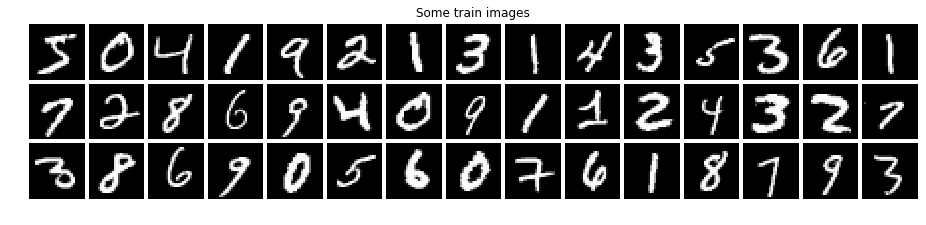

In [4]:
(X_train, y_train), _ = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, IMG_H, IMG_W, IMG_C) # NHWC
X_train = X_train / 255.   # [0., 1.]
X_train = 2 * X_train - 1  # [-1., 1.]

print('X_train: ', end='')
print(X_train.shape, X_train.dtype, end=' ')
print(f'[{X_train.min()}, {X_train.max()}]')

grid_vis(X_train, rows=3, plt_title='Some train images')

## 3. DCGAN

In [5]:
Z_DIM = 50
NUM_EPOCHS = 10
BATCH_SIZE = 128
PRINT_EVERY = 2

dc_gan = DCGAN(z_dim=Z_DIM, img_h=IMG_H, img_w=IMG_W, img_c=IMG_C, dataset_name=DATASET_NAME)

### 3.1 Training

Epoch 0


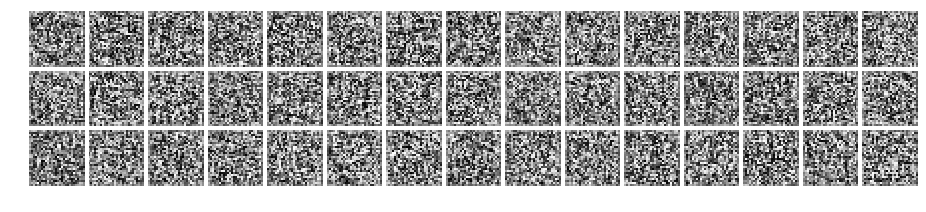

Epoch: 2, D_loss: 1.2604, G_loss: 0.8945


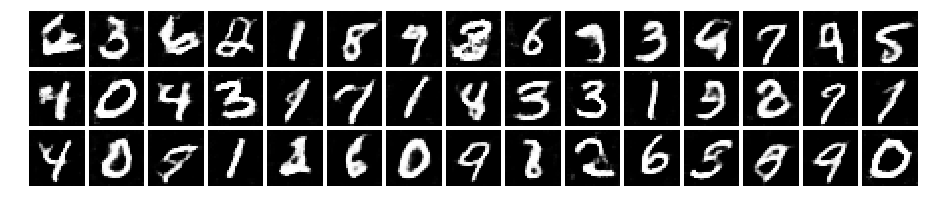

Epoch: 4, D_loss: 1.2722, G_loss: 0.8640


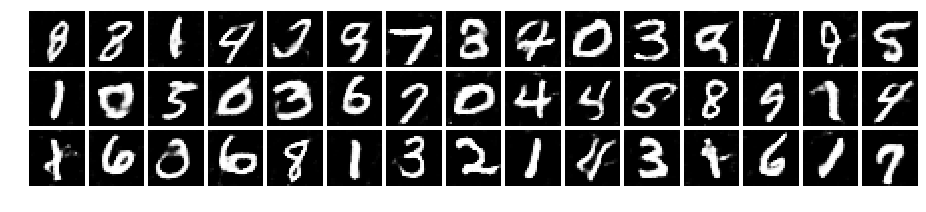

Epoch: 6, D_loss: 1.2232, G_loss: 0.9363


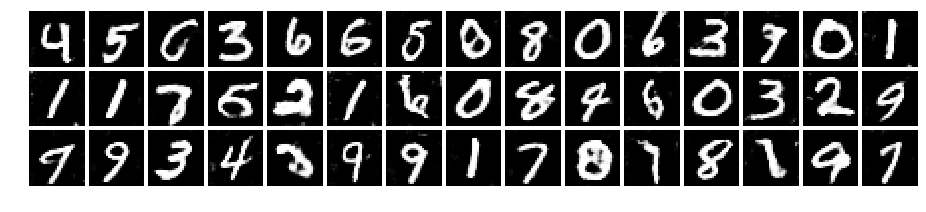

Epoch: 8, D_loss: 1.1422, G_loss: 1.0508


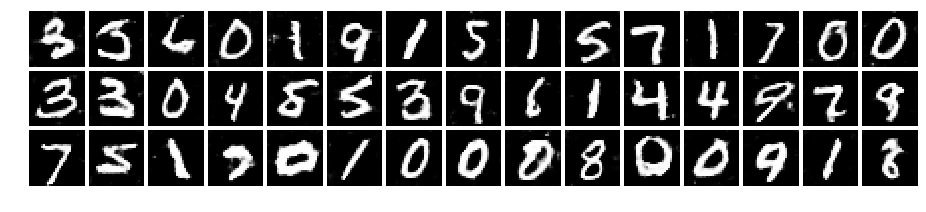

Epoch: 10, D_loss: 1.0524, G_loss: 1.2075


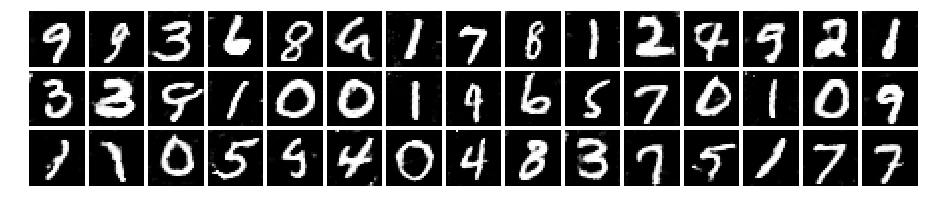

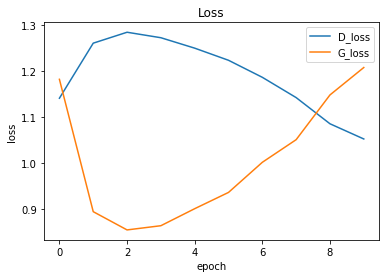

In [6]:
(D_loss, G_loss) = dc_gan.train(X_train, 
                                batch_size=BATCH_SIZE, 
                                num_epochs=NUM_EPOCHS, 
                                print_every=PRINT_EVERY)
plt.figure()
plt.title('Loss')
plt.plot(D_loss[1:], label='D_loss')
plt.plot(G_loss[1:], label='G_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### 3.2 Image generation

INFO:tensorflow:Restoring parameters from ./saved_models/dcgan_MNIST.ckpt


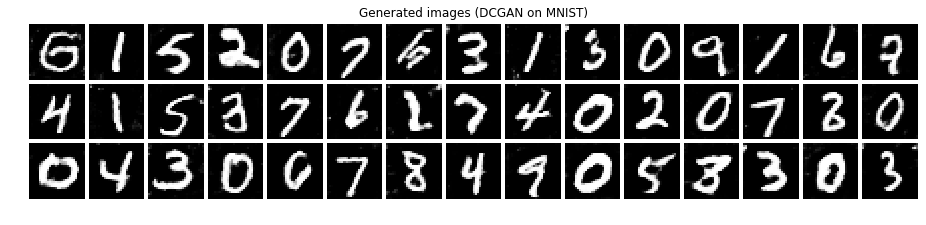

In [7]:
generated_images = dc_gan.generate_images_np(num_images=45)
grid_vis(generated_images, rows=3, cols=15, 
         plt_title=f'Generated images (DCGAN on {DATASET_NAME})')